# Imports

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pysign.infos import location_movement
import pysign.utils

# Params

In [25]:
subject = '133502'

# Loading

In [120]:
result_fname = [elem for elem in os.listdir('data') if elem.split('_')[0]==subject and elem.split('.')[-1]=='csv'][-1]
result_df = pd.read_csv(f'data\\{result_fname}').rename(columns = {'recall_key.rt':'rt', 'recall_key.keys':'keys'})
result_df['press_true'] = result_df['keys']=='c'

result_df = result_df.iloc[1:].reset_index(drop=True)

result_df['correct'] = (result_df['is_true'] == result_df['press_true']).astype(str)
# result_df[['condition', 'block']] = result_df[['condition', 'block']].astype(int).astype(str)

column_of_interest = ['is_true', 'press_true', 'correct', 'rt', 'condition', 'block', 'video_1', 'video_2', 'video_3', 'video_4', 'target']
result_df = result_df[column_of_interest]

result_df = result_df.dropna()
result_df

,is_true,press_true,correct,rt,condition,block,video_1,video_2,video_3,video_4,target
0,False,False,True,1.820360,1.0,1.0,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Forearm_Y_Back.mp4
1,True,True,True,1.954597,1.0,1.0,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4
2,False,False,True,1.693121,1.0,1.0,video_light\Middleface_Y_Back.mp4,video_light\Middleface_Y_Back.mp4,video_light\Middleface_Y_Back.mp4,video_light\Middleface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4
3,False,False,True,1.090038,1.0,1.0,video_light\Upperface_Y_For.mp4,video_light\Upperface_Y_For.mp4,video_light\Upperface_Y_For.mp4,video_light\Upperface_Y_For.mp4,video_light\Torso_Z_For.mp4
4,False,False,True,1.546881,1.0,1.0,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Upperface_Y_Back.mp4
...,...,...,...,...,...,...,...,...,...,...,...
84,True,True,True,6.272690,1.0,3.0,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_For.mp4
85,True,False,False,3.840149,1.0,3.0,video_light\Upperarm_Z_Back.mp4,video_light\Upperarm_Z_Back.mp4,video_light\Upperarm_Z_Back.mp4,video_light\Upperarm_Z_Back.mp4,video_light\Upperarm_Z_Back.mp4
86,True,False,False,2.576614,1.0,3.0,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4
87,False,False,True,0.991986,1.0,3.0,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperarm_Y_Back.mp4,video_light\Upperface_Y_For.mp4


# Reaction Time

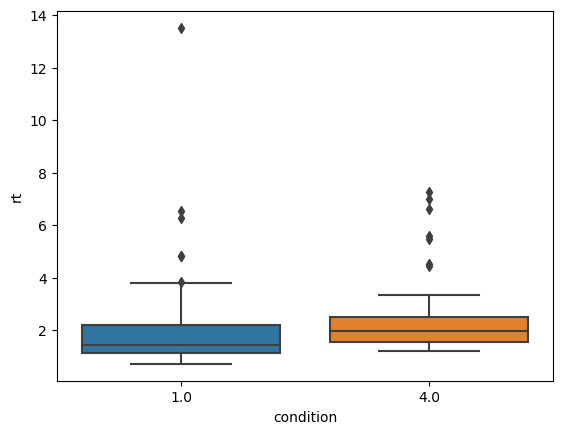

In [121]:
sns.boxplot(data=result_df, x='condition', y='rt')
plt.show()

# Correct

## Global

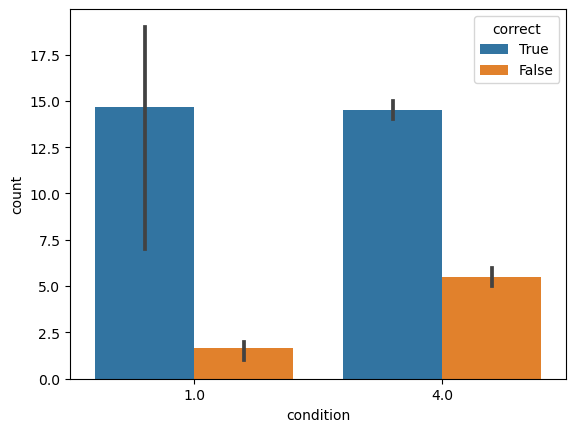

In [122]:
iv = ['condition', 'block']
dv = ['correct']

count_df = result_df[iv+dv].groupby(iv).value_counts().reset_index().rename(columns={0:'count'})

sns.barplot(count_df, x='condition', y='count', hue='correct')
plt.show()

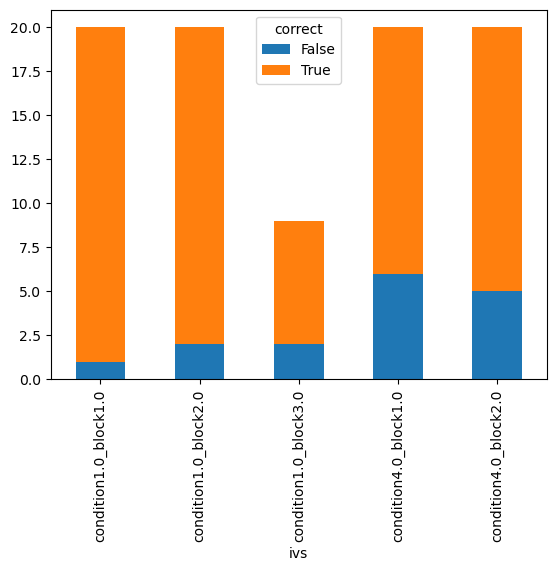

In [123]:
iv = ['condition', 'block']
dv = ['correct']

count_df = result_df[iv+dv].groupby(iv).value_counts().reset_index()
count_df['ivs'] = count_df[iv].apply(lambda x : '_'.join([f"{iv[i]}{x[i]}" for i in range(len(x))]), axis=1)
count_df = count_df.pivot(index='ivs', columns=dv, values=0)

count_df.plot(kind='bar', stacked=True)
plt.show()

## Confusion matrix

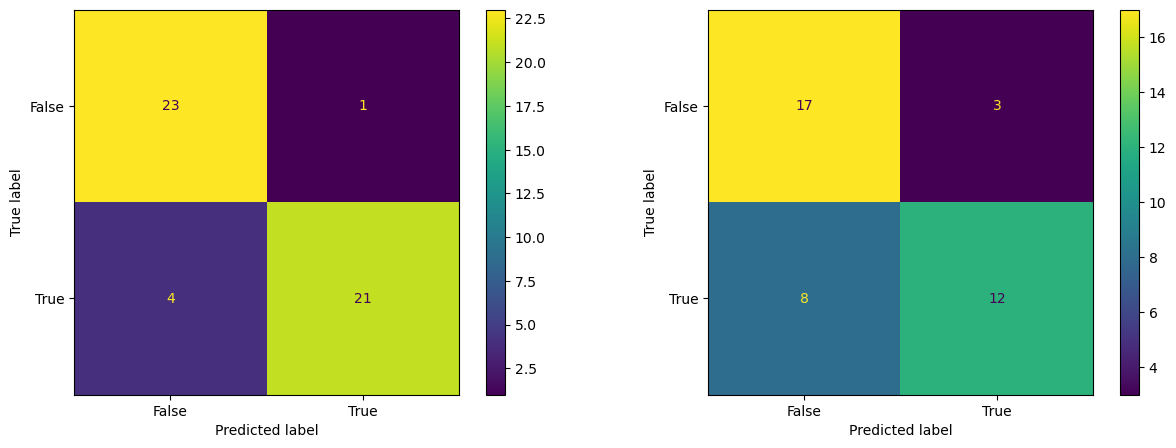

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay

true_label = 'is_true'
predicted_label = 'press_true'

confusion_df = result_df[[true_label, predicted_label, 'condition']].copy()

fix, axs = plt.subplots(1,2, figsize=(15,5))
for i, condition in enumerate(confusion_df['condition'].unique()):
    plot_df = confusion_df[confusion_df['condition']==condition].groupby(by=[true_label])[predicted_label].value_counts()
    plot_df.name=None
    confusion_array = plot_df.reset_index().pivot(columns=predicted_label, index=true_label, values=0).values

    ConfusionMatrixDisplay(confusion_array, display_labels=['False', 'True']).plot(ax=axs[i])

plt.show()

# Confounding factors

In [125]:
from pysign.utils import fname_from_path, name_to_config

result_df[['condition', 'block']] = result_df[['condition', 'block']].astype(int).astype(str)

## Discriminative power of each parameter

In [108]:
def process_a_row(row):
    target = name_to_config(fname_from_path(row['target']))
    target['localisation_detail'] = [area_name for area_name, area in location_movement.items() if target['localisation_detail'] in area['localisation_detail']][0]

    sequence = row[['video_1', 'video_2', 'video_3', 'video_4']].apply(lambda x : pd.Series(name_to_config(fname_from_path(x))))
    sequence['localisation_detail'] = [[area_name for area_name, area in location_movement.items() if elem in area['localisation_detail']][0] for elem in sequence['localisation_detail']]

    out = {f'target_{key}':value for key, value in target.items()}
    out.update({f'sequence_{col}':set(sequence[col]) for col in sequence.columns})
    return pd.Series(out)

combinatory_result_df = result_df[result_df['condition']=='4'].copy()

combinatory_result_df[['target_localisation_detail', 'target_movement', 'target_direction',
       'sequence_localisation_detail', 'sequence_movement',
       'sequence_direction']] = combinatory_result_df.apply(process_a_row, axis=1)

for param in ['localisation_detail', 'movement', 'direction']:
    combinatory_result_df[f'contain_{param}'] = combinatory_result_df.apply(lambda x : x[f'target_{param}'] in x[f'sequence_{param}'], axis=1)

combinatory_result_df

,is_true,press_true,correct,rt,condition,block,video_1,video_2,video_3,video_4,target,target_localisation_detail,target_movement,target_direction,sequence_localisation_detail,sequence_movement,sequence_direction,contain_localisation_detail,contain_movement,contain_direction
20,False,False,True,2.035113,4,1,video_light\Forearm_Z_Back.mp4,video_light\Upperface_Y_Back.mp4,video_light\Torso_X_Back.mp4,video_light\Upperarm_Z_For.mp4,video_light\Upperarm_Y_Back.mp4,Arm,Y,Back,"{Torso, Face, Arm}","{X, Z, Y}","{Back, For}",True,True,True
21,True,True,True,1.671678,4,1,video_light\Torso_X_For.mp4,video_light\Forearm_Y_For.mp4,video_light\Forearm_Y_Back.mp4,video_light\Forearm_Z_Back.mp4,video_light\Forearm_Y_Back.mp4,Arm,Y,Back,"{Torso, Arm}","{X, Z, Y}","{Back, For}",True,True,True
22,True,False,False,1.433358,4,1,video_light\Upperarm_Z_For.mp4,video_light\Middleface_Y_For.mp4,video_light\Torso_X_Back.mp4,video_light\Torso_Z_For.mp4,video_light\Middleface_Y_For.mp4,Face,Y,For,"{Torso, Face, Arm}","{X, Z, Y}","{Back, For}",True,True,True
23,False,False,True,2.272651,4,1,video_light\Upperarm_Z_For.mp4,video_light\Torso_Z_Back.mp4,video_light\Forearm_Y_For.mp4,video_light\Upperarm_Z_Back.mp4,video_light\Torso_Z_For.mp4,Torso,Z,For,"{Torso, Arm}","{Z, Y}","{Back, For}",True,True,True
24,False,False,True,1.453289,4,1,video_light\Middleface_Y_Back.mp4,video_light\Torso_Z_For.mp4,video_light\Lowerface_Y_For.mp4,video_light\Torso_X_For.mp4,video_light\Forearm_Y_Back.mp4,Arm,Y,Back,"{Torso, Face}","{X, Z, Y}","{Back, For}",False,True,True
25,True,False,False,3.329472,4,1,video_light\Upperarm_Z_For.mp4,video_light\Forearm_Y_For.mp4,video_light\Torso_Z_Back.mp4,video_light\Upperface_Y_For.mp4,video_light\Upperface_Y_For.mp4,Face,Y,For,"{Torso, Face, Arm}","{Z, Y}","{Back, For}",True,True,True
26,True,False,False,2.786993,4,1,video_light\Torso_X_For.mp4,video_light\Torso_X_Back.mp4,video_light\Lowerface_Y_For.mp4,video_light\Upperarm_Y_For.mp4,video_light\Torso_X_Back.mp4,Torso,X,Back,"{Torso, Face, Arm}","{X, Y}","{Back, For}",True,True,True
27,False,False,True,1.238869,4,1,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_Back.mp4,video_light\Forearm_Y_For.mp4,video_light\Middleface_Y_For.mp4,video_light\Torso_Z_For.mp4,Torso,Z,For,"{Face, Arm}","{Z, Y}","{Back, For}",False,True,True
28,True,True,True,1.852684,4,1,video_light\Middleface_Y_Back.mp4,video_light\Forearm_Z_Back.mp4,video_light\Forearm_Z_For.mp4,video_light\Forearm_Y_Back.mp4,video_light\Forearm_Y_Back.mp4,Arm,Y,Back,"{Face, Arm}","{Z, Y}","{Back, For}",True,True,True
29,False,False,True,1.878202,4,1,video_light\Torso_Z_For.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_For.mp4,video_light\Forearm_Y_Back.mp4,video_light\Forearm_Y_For.mp4,Arm,Y,For,"{Torso, Face, Arm}","{Z, Y}","{Back, For}",True,True,True


In [110]:
iv = ['contain_localisation_detail', 'contain_movement', 'contain_direction']
dv = ['correct']

count_df = combinatory_result_df[iv+dv].groupby(iv).value_counts().reset_index().rename(columns={0:'count'})

count_df = count_df.pivot(index=iv, columns='correct', values='count').fillna(0).reset_index()

count_df

# sns.barplot(count_df, x='condition', y='count', hue='correct')
# plt.show()

correct,contain_localisation_detail,contain_movement,contain_direction,False,True
0,False,False,True,0.0,2.0
1,False,True,True,0.0,3.0
2,True,False,False,0.0,1.0
3,True,True,True,11.0,23.0


Not enough data in each class, to much combinations ?

## Was a similar one presented ?

In [117]:
def process_a_row(row):
    target = name_to_config(fname_from_path(row['target']))
    target['localisation_detail'] = [area_name for area_name, area in location_movement.items() if target['localisation_detail'] in area['localisation_detail']][0]

    sequence = row[['video_1', 'video_2', 'video_3', 'video_4']].apply(lambda x : pd.Series(name_to_config(fname_from_path(x))))
    sequence['localisation_detail'] = [[area_name for area_name, area in location_movement.items() if elem in area['localisation_detail']][0] for elem in sequence['localisation_detail']]

    for col in sequence.columns:
        sequence[col] = [elem==target[col] for elem in sequence[col]]
    
    max_similarity = sequence.sum(axis=1).max()

    return max_similarity

similar_result_df = result_df[result_df['condition']=='4'].copy()

similar_result_df['max_similarity'] = similar_result_df.apply(process_a_row, axis=1)

similar_result_df

,is_true,press_true,correct,rt,condition,block,video_1,video_2,video_3,video_4,...,target_localisation_detail,target_movement,target_direction,sequence_localisation_detail,sequence_movement,sequence_direction,contain_localisation_detail,contain_movement,contain_direction,max_similarity
20,False,False,True,2.035113,4,1,video_light\Forearm_Z_Back.mp4,video_light\Upperface_Y_Back.mp4,video_light\Torso_X_Back.mp4,video_light\Upperarm_Z_For.mp4,...,Arm,Y,Back,"{Torso, Face, Arm}","{X, Z, Y}","{Back, For}",True,True,True,2
21,True,True,True,1.671678,4,1,video_light\Torso_X_For.mp4,video_light\Forearm_Y_For.mp4,video_light\Forearm_Y_Back.mp4,video_light\Forearm_Z_Back.mp4,...,Arm,Y,Back,"{Torso, Arm}","{X, Z, Y}","{Back, For}",True,True,True,3
22,True,False,False,1.433358,4,1,video_light\Upperarm_Z_For.mp4,video_light\Middleface_Y_For.mp4,video_light\Torso_X_Back.mp4,video_light\Torso_Z_For.mp4,...,Face,Y,For,"{Torso, Face, Arm}","{X, Z, Y}","{Back, For}",True,True,True,3
23,False,False,True,2.272651,4,1,video_light\Upperarm_Z_For.mp4,video_light\Torso_Z_Back.mp4,video_light\Forearm_Y_For.mp4,video_light\Upperarm_Z_Back.mp4,...,Torso,Z,For,"{Torso, Arm}","{Z, Y}","{Back, For}",True,True,True,2
24,False,False,True,1.453289,4,1,video_light\Middleface_Y_Back.mp4,video_light\Torso_Z_For.mp4,video_light\Lowerface_Y_For.mp4,video_light\Torso_X_For.mp4,...,Arm,Y,Back,"{Torso, Face}","{X, Z, Y}","{Back, For}",False,True,True,2
25,True,False,False,3.329472,4,1,video_light\Upperarm_Z_For.mp4,video_light\Forearm_Y_For.mp4,video_light\Torso_Z_Back.mp4,video_light\Upperface_Y_For.mp4,...,Face,Y,For,"{Torso, Face, Arm}","{Z, Y}","{Back, For}",True,True,True,3
26,True,False,False,2.786993,4,1,video_light\Torso_X_For.mp4,video_light\Torso_X_Back.mp4,video_light\Lowerface_Y_For.mp4,video_light\Upperarm_Y_For.mp4,...,Torso,X,Back,"{Torso, Face, Arm}","{X, Y}","{Back, For}",True,True,True,3
27,False,False,True,1.238869,4,1,video_light\Forearm_Z_For.mp4,video_light\Forearm_Z_Back.mp4,video_light\Forearm_Y_For.mp4,video_light\Middleface_Y_For.mp4,...,Torso,Z,For,"{Face, Arm}","{Z, Y}","{Back, For}",False,True,True,2
28,True,True,True,1.852684,4,1,video_light\Middleface_Y_Back.mp4,video_light\Forearm_Z_Back.mp4,video_light\Forearm_Z_For.mp4,video_light\Forearm_Y_Back.mp4,...,Arm,Y,Back,"{Face, Arm}","{Z, Y}","{Back, For}",True,True,True,3
29,False,False,True,1.878202,4,1,video_light\Torso_Z_For.mp4,video_light\Lowerface_Y_Back.mp4,video_light\Lowerface_Y_For.mp4,video_light\Forearm_Y_Back.mp4,...,Arm,Y,For,"{Torso, Face, Arm}","{Z, Y}","{Back, For}",True,True,True,2


In [119]:
iv = ['max_similarity']
dv = ['correct']

count_df = similar_result_df[iv+dv].groupby(iv).value_counts().reset_index().rename(columns={0:'count'})

count_df = count_df.pivot(index=iv, columns='correct', values='count').fillna(0).reset_index()

count_df

correct,max_similarity,False,True
0,1,0.0,3.0
1,2,2.0,14.0
2,3,9.0,12.0
